In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re
import requests
from bs4 import BeautifulSoup

In [4]:
imdbf=pd.read_excel('C:/Users/Acer/12JAN-18JAN2025-GENAI/DATASETS/IMDB Movie Reviews .xlsx')

In [5]:
imdbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
imdbf.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [8]:
numcols=imdbf[['Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']]

In [9]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].mean())

C:\Users\Acer\AppData\Local\Temp\ipykernel_12412\2069034981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].mean())


In [10]:
pd.set_option("display.max_colwidth",None)
imdbf.Description.head(2)

0    A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
1    Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.
Name: Description, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf=TfidfVectorizer(max_features=100,stop_words="english",ngram_range=(2,2))

In [21]:
X_tfidf=tfidf.fit_transform(imdbf.Description)

In [22]:
X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())

In [23]:
X_tfidf.head()

,19th century,african american,alice returns,alien race,alter ego,ancient evil,arms dealer,best friend,best friends,boarding school,...,world war,year old,years later,york city,young boy,young couple,young girl,young man,young son,young woman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [26]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [29]:
imdbf_final=pd.concat([X_tfidf,numcols_scaled],axis=1)

unsupervised learning - 

# Clustering algorithms are widely ised that group/cluster data based on similarities

Similarities are calculated using distance based methods like euclidean,manhattanmhamming,cosine etc.

Small distance are similar observations and farther distance dissimilar observations.

Most used is  K- Means Clustering is a centroid based clustering algorightm that groups data into clusters based disance calculated

Distance is calulcated from centroid ( midpoint) of the cluster and every cluster has its own centroid


K means is an iterative algorithm that iterates and builds clusters as long as there is no change in clster formations.

Default distance method used is euclidean for numeric data. In case of large scale Text clustering cosine simalirty is used as metric.

There is no fixed formula for identifying exact value of K. K is an integer value that specifies how many clusters to be built and must be provided for the algorithm.


Optimal value of K can be identified using Elbow P.ot.
Elbow plut will have cluster number on x-axiz and within cluster sum square error or vairace on y axis


In [30]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [33]:
wcss_list=[]
for i in range(1,15):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(imdbf_final)
        wcss_list.append(kmeans.inertia_)

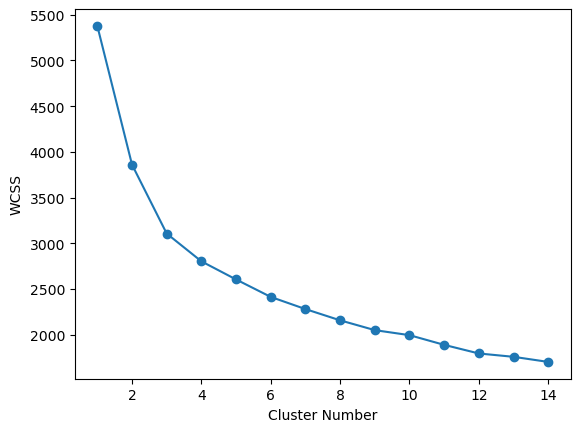

In [34]:
plt.plot(range(1,15),wcss_list,marker="o")
plt.ylabel("WCSS")
plt.xlabel("Cluster Number")
plt.show()

In [36]:
kmeans_clust=KMeans(n_clusters=3).fit(imdbf_final)

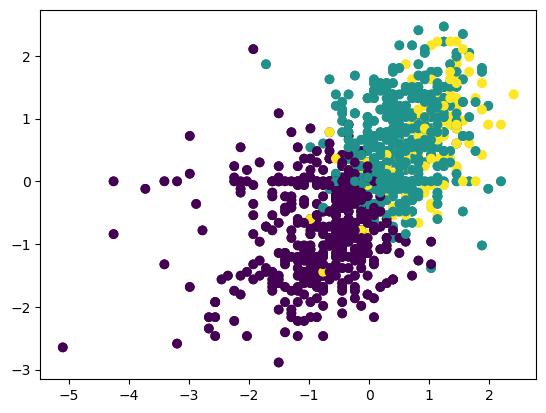

In [40]:
plt.scatter(imdbf_final['Rating'],imdbf_final['Metascore'],c=kmeans_clust.labels_)  # by default  Rating X axis, Metascore Y axis
plt.show()

# KEMANS IS NOT GIVING CLEAR ANSWER

In [ ]:
Second Clustering method is Hierarchical clustering. Also distance based method , default is euclidean

output of this clustering is Dendrogram which is a tree based structure that displays clusters as branches
with in Hierarchical clustering 2 methods are there

Agglomerative Method - Starts with all observations as single cluster and 
GRoups clusters based on distance untill only one

Divisve method - Starts with each observation as its own cluster based on dissimilary grouping will be done

In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [42]:
euclid_dist=euclidean_distances(imdbf_final)

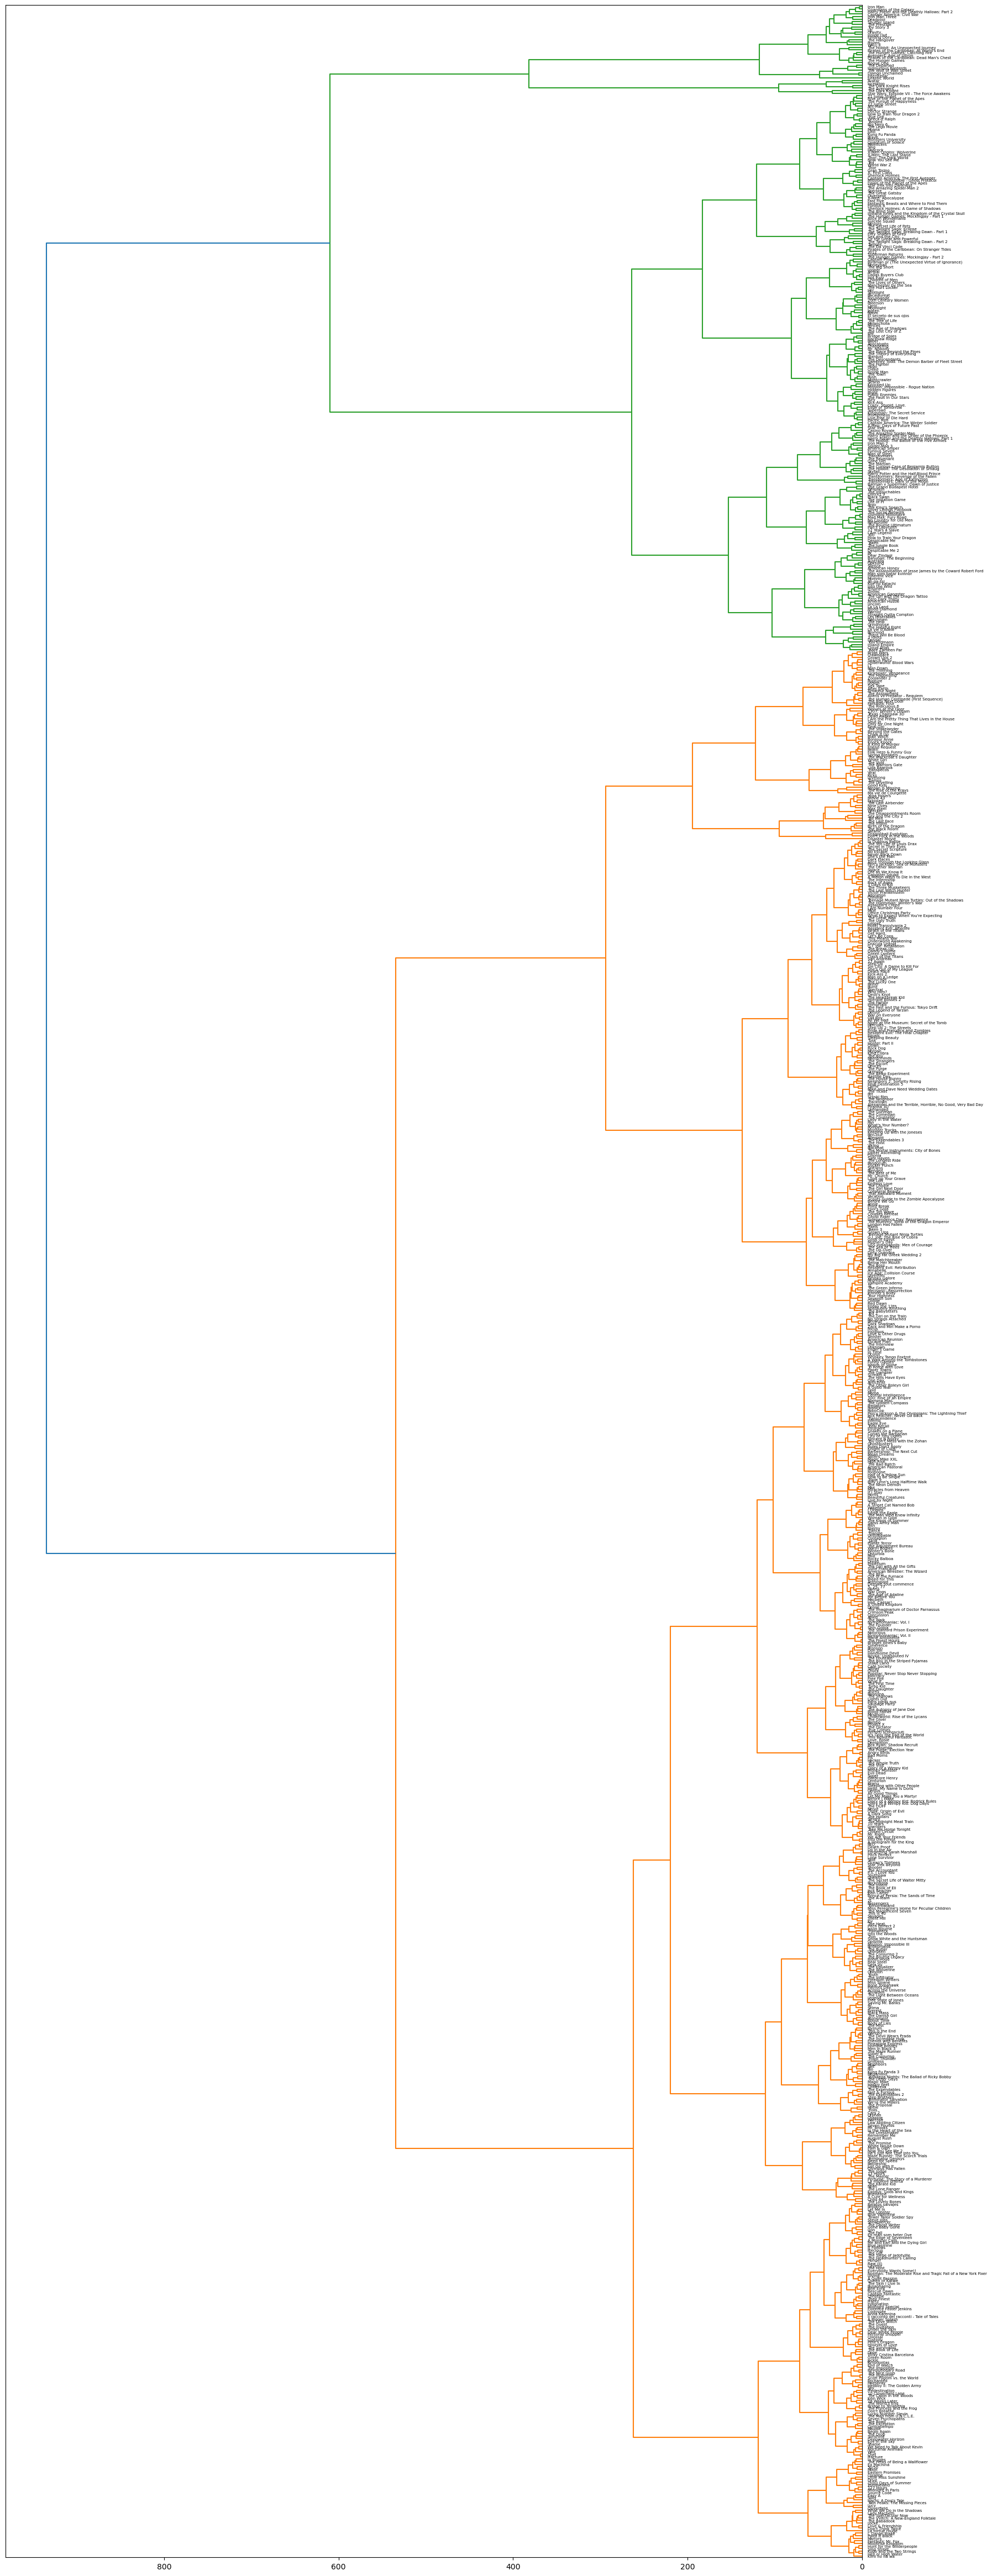

In [43]:
plt.figure(figsize=(20,60))
dendogram=sch.dendrogram(sch.linkage(euclid_dist,method="ward"),
                        orientation='left',
                        labels=imdbf['Title'].values.tolist(),p=200
                        )
plt.show()